# Browser Automation

## 1) Install packages

### Install Selenium

In [1]:
!pip install selenium


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Install Chrome Driver (Special handling in Colab for ChromeDriver after version 115)
* Find the newest `linux64` version from https://googlechromelabs.github.io/chrome-for-testing/
* Replace the link to `chromedriver-linux64.zip` below

Reference: https://github.com/googlecolab/colabtools/issues/3347

In [2]:
!sudo apt -y update
!rm -f *.deb
!sudo apt install -y wget curl unzip libvulkan1
!wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
!dpkg -i libu2f-udev_1.1.4-1_all.deb

!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb

!rm -rf /tmp/*
!wget -N https://storage.googleapis.com/chrome-for-testing-public/129.0.6668.70/linux64/chrome-linux64.zip -P /tmp/
!unzip -o /tmp/chromedriver-linux64.zip -d /tmp/
!cp -rf /tmp/chromedriver-linux64 /tmp/chromedriver
!chmod +x /tmp/chromedriver/chromedriver
!mv /tmp/chromedriver/chromedriver /usr/local/bin/chromedriver

'sudo' 不是內部或外部命令、可執行的程式或批次檔。
'rm' 不是內部或外部命令、可執行的程式或批次檔。
'sudo' 不是內部或外部命令、可執行的程式或批次檔。
'wget' 不是內部或外部命令、可執行的程式或批次檔。
'dpkg' 不是內部或外部命令、可執行的程式或批次檔。
'wget' 不是內部或外部命令、可執行的程式或批次檔。
'dpkg' 不是內部或外部命令、可執行的程式或批次檔。
'rm' 不是內部或外部命令、可執行的程式或批次檔。
'wget' 不是內部或外部命令、可執行的程式或批次檔。
'unzip' 不是內部或外部命令、可執行的程式或批次檔。
'cp' 不是內部或外部命令、可執行的程式或批次檔。
'chmod' 不是內部或外部命令、可執行的程式或批次檔。
'mv' 不是內部或外部命令、可執行的程式或批次檔。


## 2) Import Libraries

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [4]:
import io
from urllib.request import urlopen
import requests
import pandas as pd
from bs4 import BeautifulSoup, element
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3) First Attempt - Requests

### 3.1) Get main supermarket page

In [5]:
homepage_url = 'https://www.hktvmall.com/hktv/en/supermarket'
homepage_response = requests.get(homepage_url)
homepage_soup = BeautifulSoup(homepage_response.content, 'html.parser')

## 3.2) Get categories

In [6]:
# <div class="submenu-nav">
category_tags = [div_tag for div_tag in homepage_soup.find_all('div') if div_tag.attrs.get('class') == ['submenu-nav']]

In [7]:
# Create lists
category_name_list = []
category_code_list = []
sub_category_code_list = []
sub_category_link_list = []

for category_tag in category_tags:
  for link_tag in category_tag.find_all('a'):
    link_text = link_tag.string
    category_code = link_tag.attrs.get('data-maincat')
    sub_category_code = link_tag.attrs.get('data-cat')
    link_url = link_tag.attrs.get('href')
    display_text = link_tag.getText()
    if '\xa0' in display_text:
      # Clean up the display text
      display_text = display_text[:display_text.index('\xa0')]
      # The links are relative paths, we need to add back the main url
      link_url = 'https://www.hktvmall.com' + link_url
      category_name_list.append(display_text)
      category_code_list.append(category_code)
      sub_category_code_list.append(sub_category_code)
      sub_category_link_list.append(link_url)

In [8]:
# Create dataframe for category
df_category = pd.DataFrame({'Category': category_name_list,
                            'Category Code': category_code_list,
                            'Sub Category Code': sub_category_code_list,
                            'Link': sub_category_link_list})
df_category

Category  Category Code Sub Category Code  \
0        Fruits & Vegetables  AA11030000000     AA11030500001   
1       Chilled/ Frozen Food  AA11030000000     AA11031000001   
2          Snacks & Desserts  AA11030000000     AA11031500001   
3                  Beverages  AA11030000000     AA11032000001   
4        Alcoholic Beverages  AA11030000000     AA11032500001   
..                       ...            ...               ...   
218             All Dog Food  AA11960000000     AA11966000001   
219          Canned Dog Food  AA11960000000     AA11966500001   
220               Dog Snacks  AA11960000000     AA11967000001   
221    Wipes & Training Pads  AA11960000000     AA11967500001   
222  Weight Control Dog Food  AA11960000000     AA11969500001   

                                                  Link  
0    https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
1    https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
2    https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
3    https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
4    https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
..                                                 ...  
218  https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
219  https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
220  https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
221  https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  
222  https://www.hktvmall.com/hktv/en/main/%E8%B6%8...  

[223 rows x 4 columns]

### 3.3) Dive into 1 category

In [9]:
df_category.loc[df_category['Category'] == 'Voucher & Festival Food']

Category  Category Code Sub Category Code  \
12  Voucher & Festival Food  AA11030000000     AA11037000001   

                                                 Link  
12  https://www.hktvmall.com/hktv/en/main/%E8%B6%8...

In [10]:
voucher_url = df_category.loc[df_category['Category'] == 'Voucher & Festival Food', 'Link'].tolist()[0]
print(f'Loading: {voucher_url}')
voucher_response = requests.get(voucher_url)
voucher_soup = BeautifulSoup(voucher_response.content, 'html.parser')

Loading: https://www.hktvmall.com/hktv/en/main/%E8%B6%85%E7%B4%9A%E5%B7%BF%E5%A0%B4/%E8%B6%85%E7%B4%9A%E5%B8%82%E5%A0%B4/%E9%87%8D%E9%87%8F%E7%B4%9A%E6%8E%A8%E4%BB%8B/%E9%A4%90%E9%A3%B2%E5%88%B8-%E7%AF%80%E6%85%B6%E9%A3%9F%E5%93%81/c/AA11037000001


### 3.4) By inspection, we know our targets are the `<div>` blocks called `promotional` and `price`
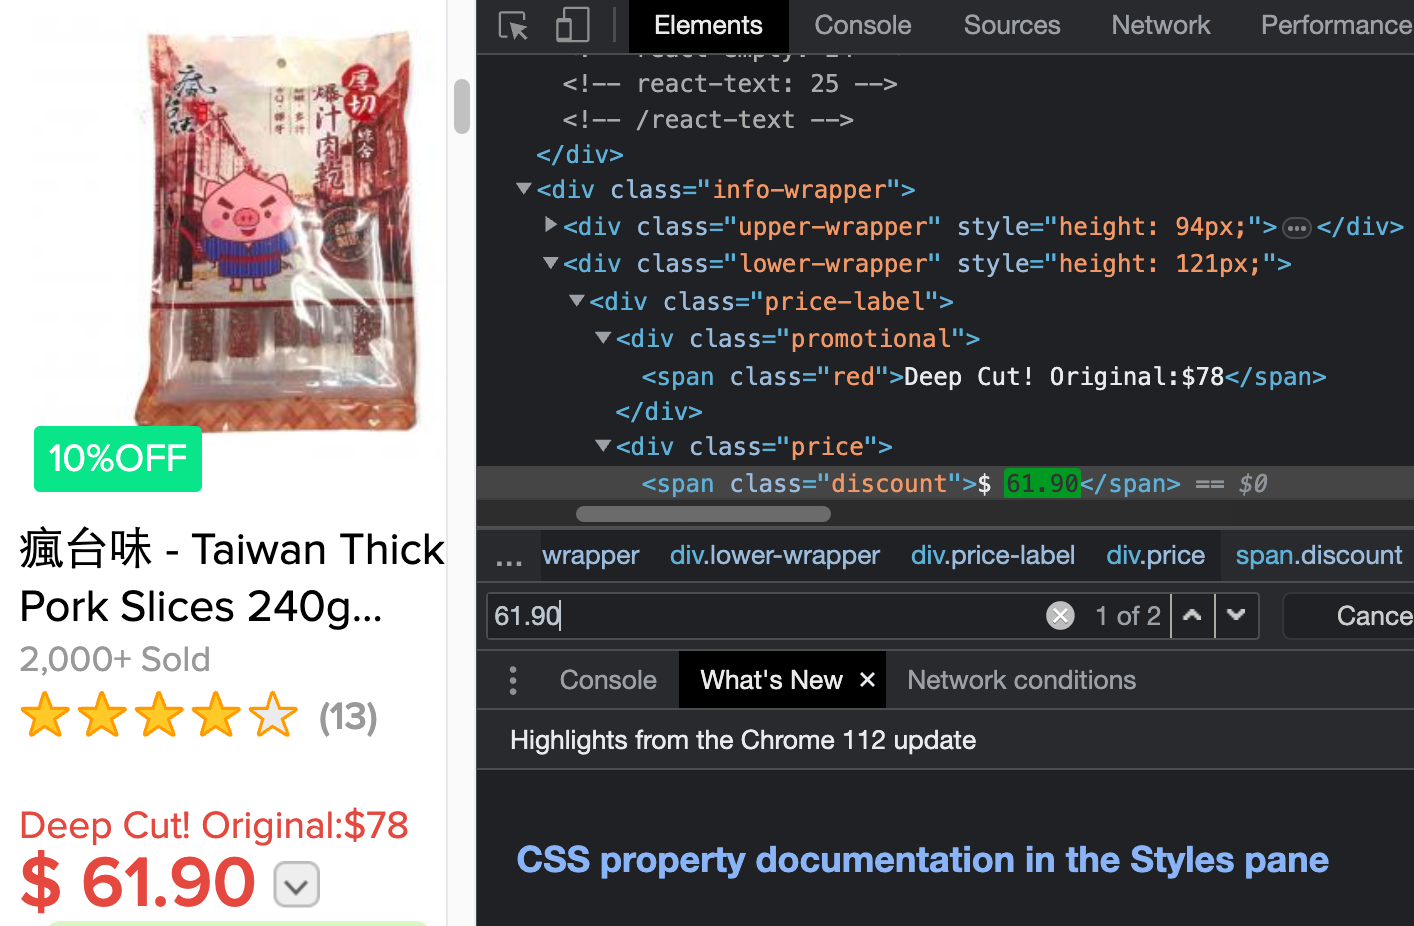

### 3.5) However, there are no such tags in the HTML file

In [11]:
# Promotional
[div_tag for div_tag in voucher_soup.find_all('div', {'class': 'promotional'})]

[]

In [12]:
# Price
[div_tag for div_tag in voucher_soup.find_all('div', {'class': 'price'})]

[]

## 4) Second attempt - Chromedriver

### 4.1) Create driver

In [ ]:
# Set options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument("--verbose")
options.add_argument('--no-sandbox')
options.add_argument('--disable-gpu')
options.add_argument("--window-size=1920, 1200")
options.add_argument('--disable-dev-shm-usage')

# Create the driver
driver = webdriver.Chrome(options=options)

### 4.2) Get the voucher page

In [ ]:
driver.get(voucher_url)

In [ ]:
driver.page_source[:100]

### 4.3) Now we can see the previously missing tags `promotional` and `price`!

In [ ]:
# promotional
len(driver.find_elements(By.CLASS_NAME, value='promotional'))

In [ ]:
# price
len(driver.find_elements(By.CLASS_NAME, value='price'))

### 4.4) To be precise, the actual product results are wrapped by `<div id="product-result">`
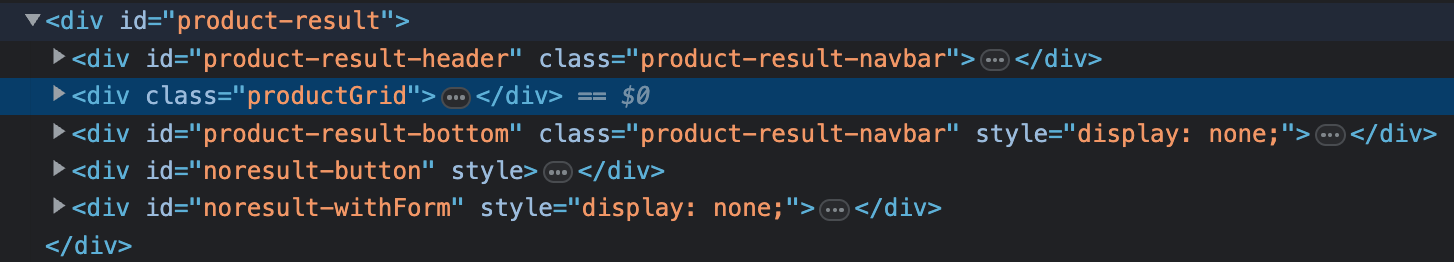

In [ ]:
product_result_tag = driver.find_element(By.ID, value='product-result')
product_result_tag

### 4.5) Each product is wrapped by `<div class="product-brief">`
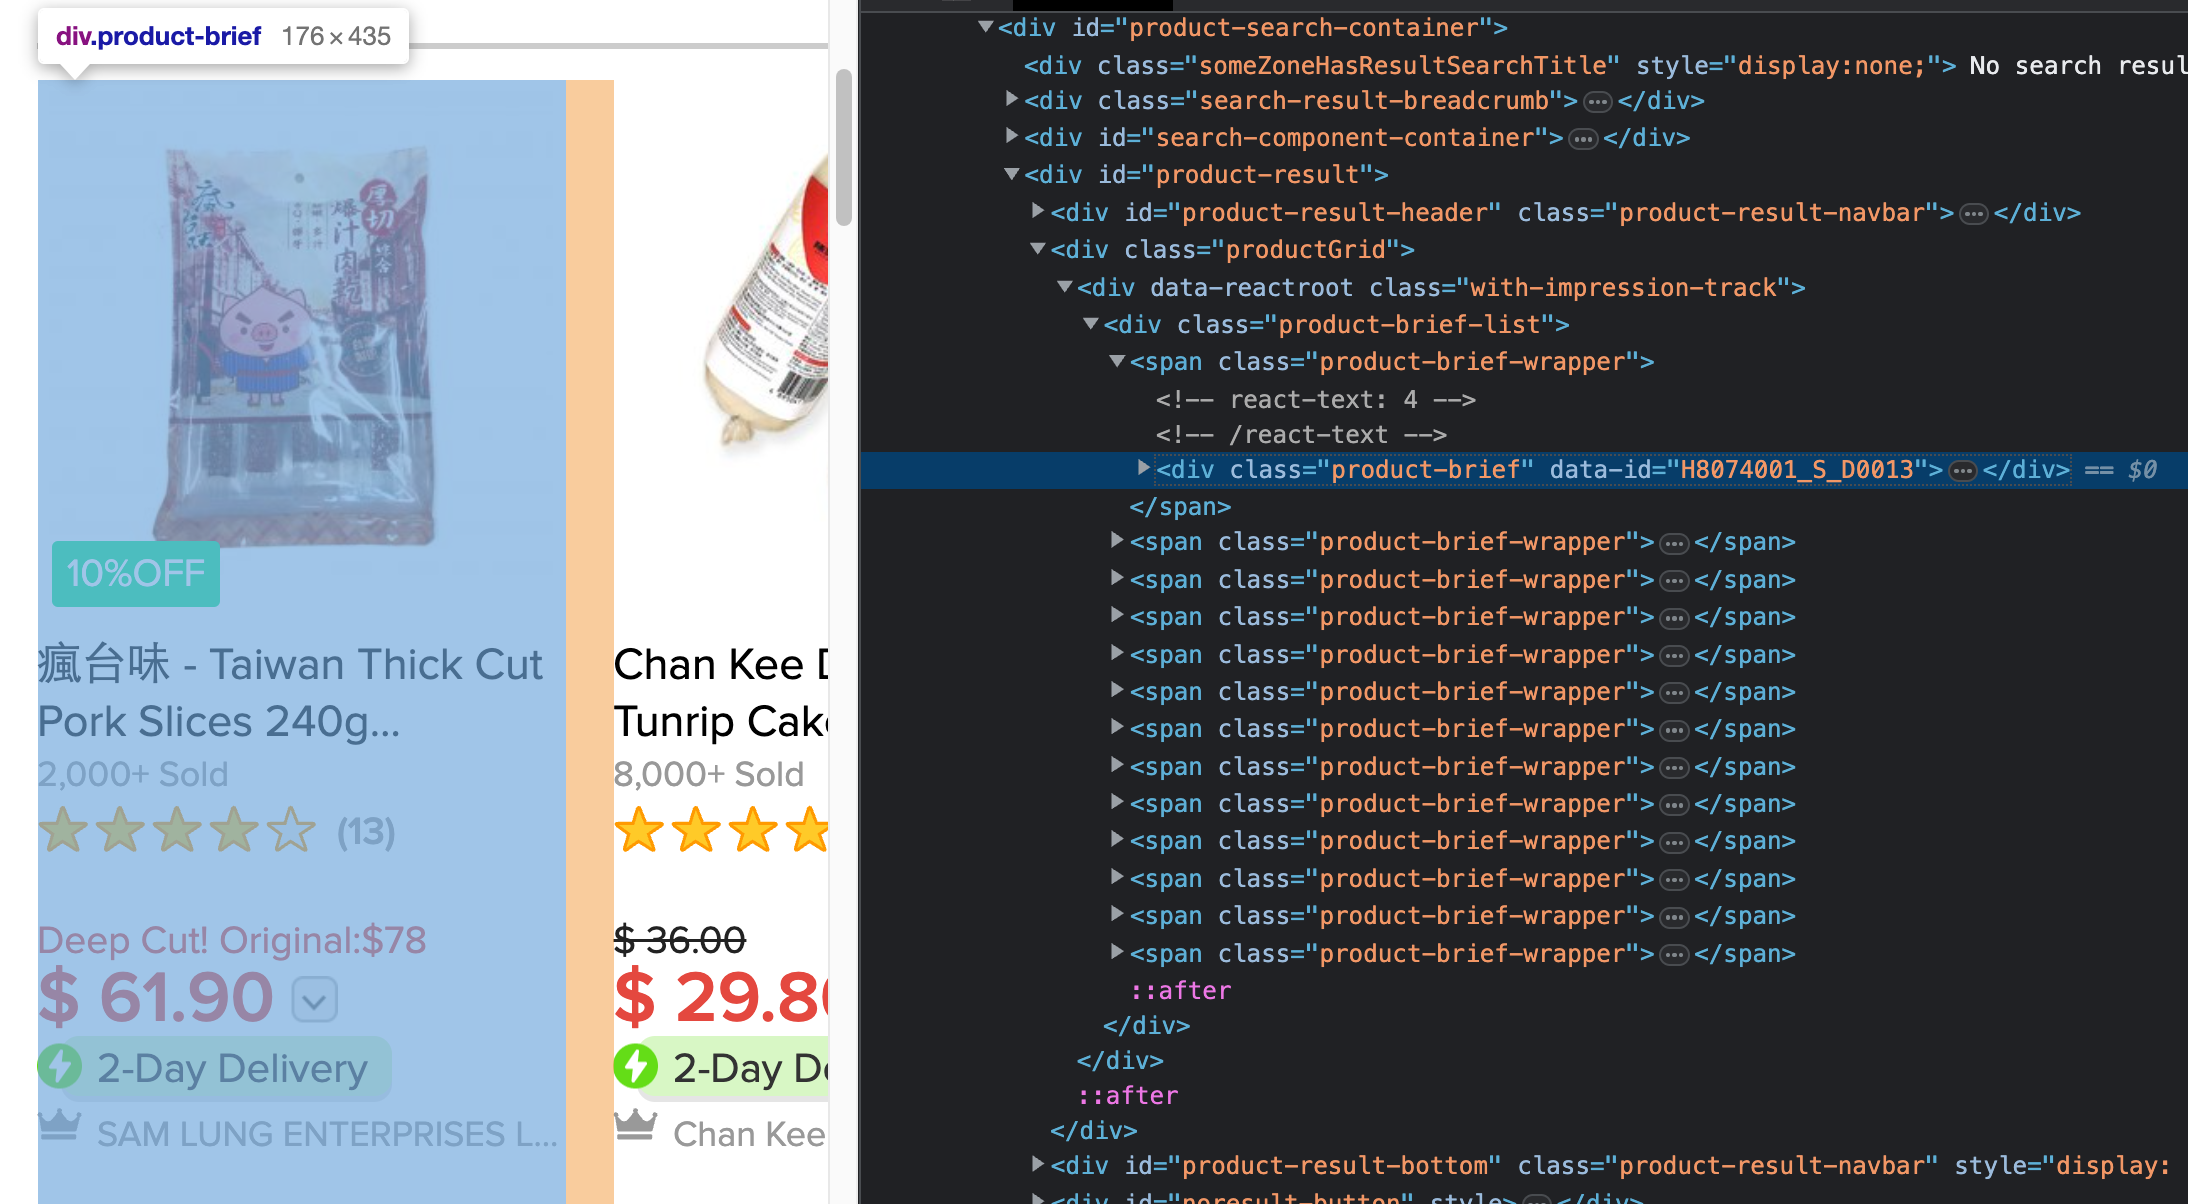

In [ ]:
brief_element = product_result_tag.find_element(By.CLASS_NAME, value='product-brief')
brief_element.get_attribute('data-id')

In [ ]:
product_name_list = []
price_list = []

for product_tag in product_result_tag.find_elements(By.CLASS_NAME, value='product-brief'):
  product_name_tag = product_tag.find_element(By.CLASS_NAME, value='brand-product-name')
  if product_name_tag.text:
    price_tag = product_tag.find_element(By.CLASS_NAME, value='price')
    product_name_list.append(product_name_tag.text)
    price_list.append(price_tag.text if price_tag else '')

In [ ]:
# Create dataframe for prices
df_prices = pd.DataFrame({'Name': product_name_list,
                          'Price': price_list})
df_prices

# 5) Bonus - Scrolling down

In [ ]:
import time

### 5.1) Sometimes the page does not finish loading until you scroll down

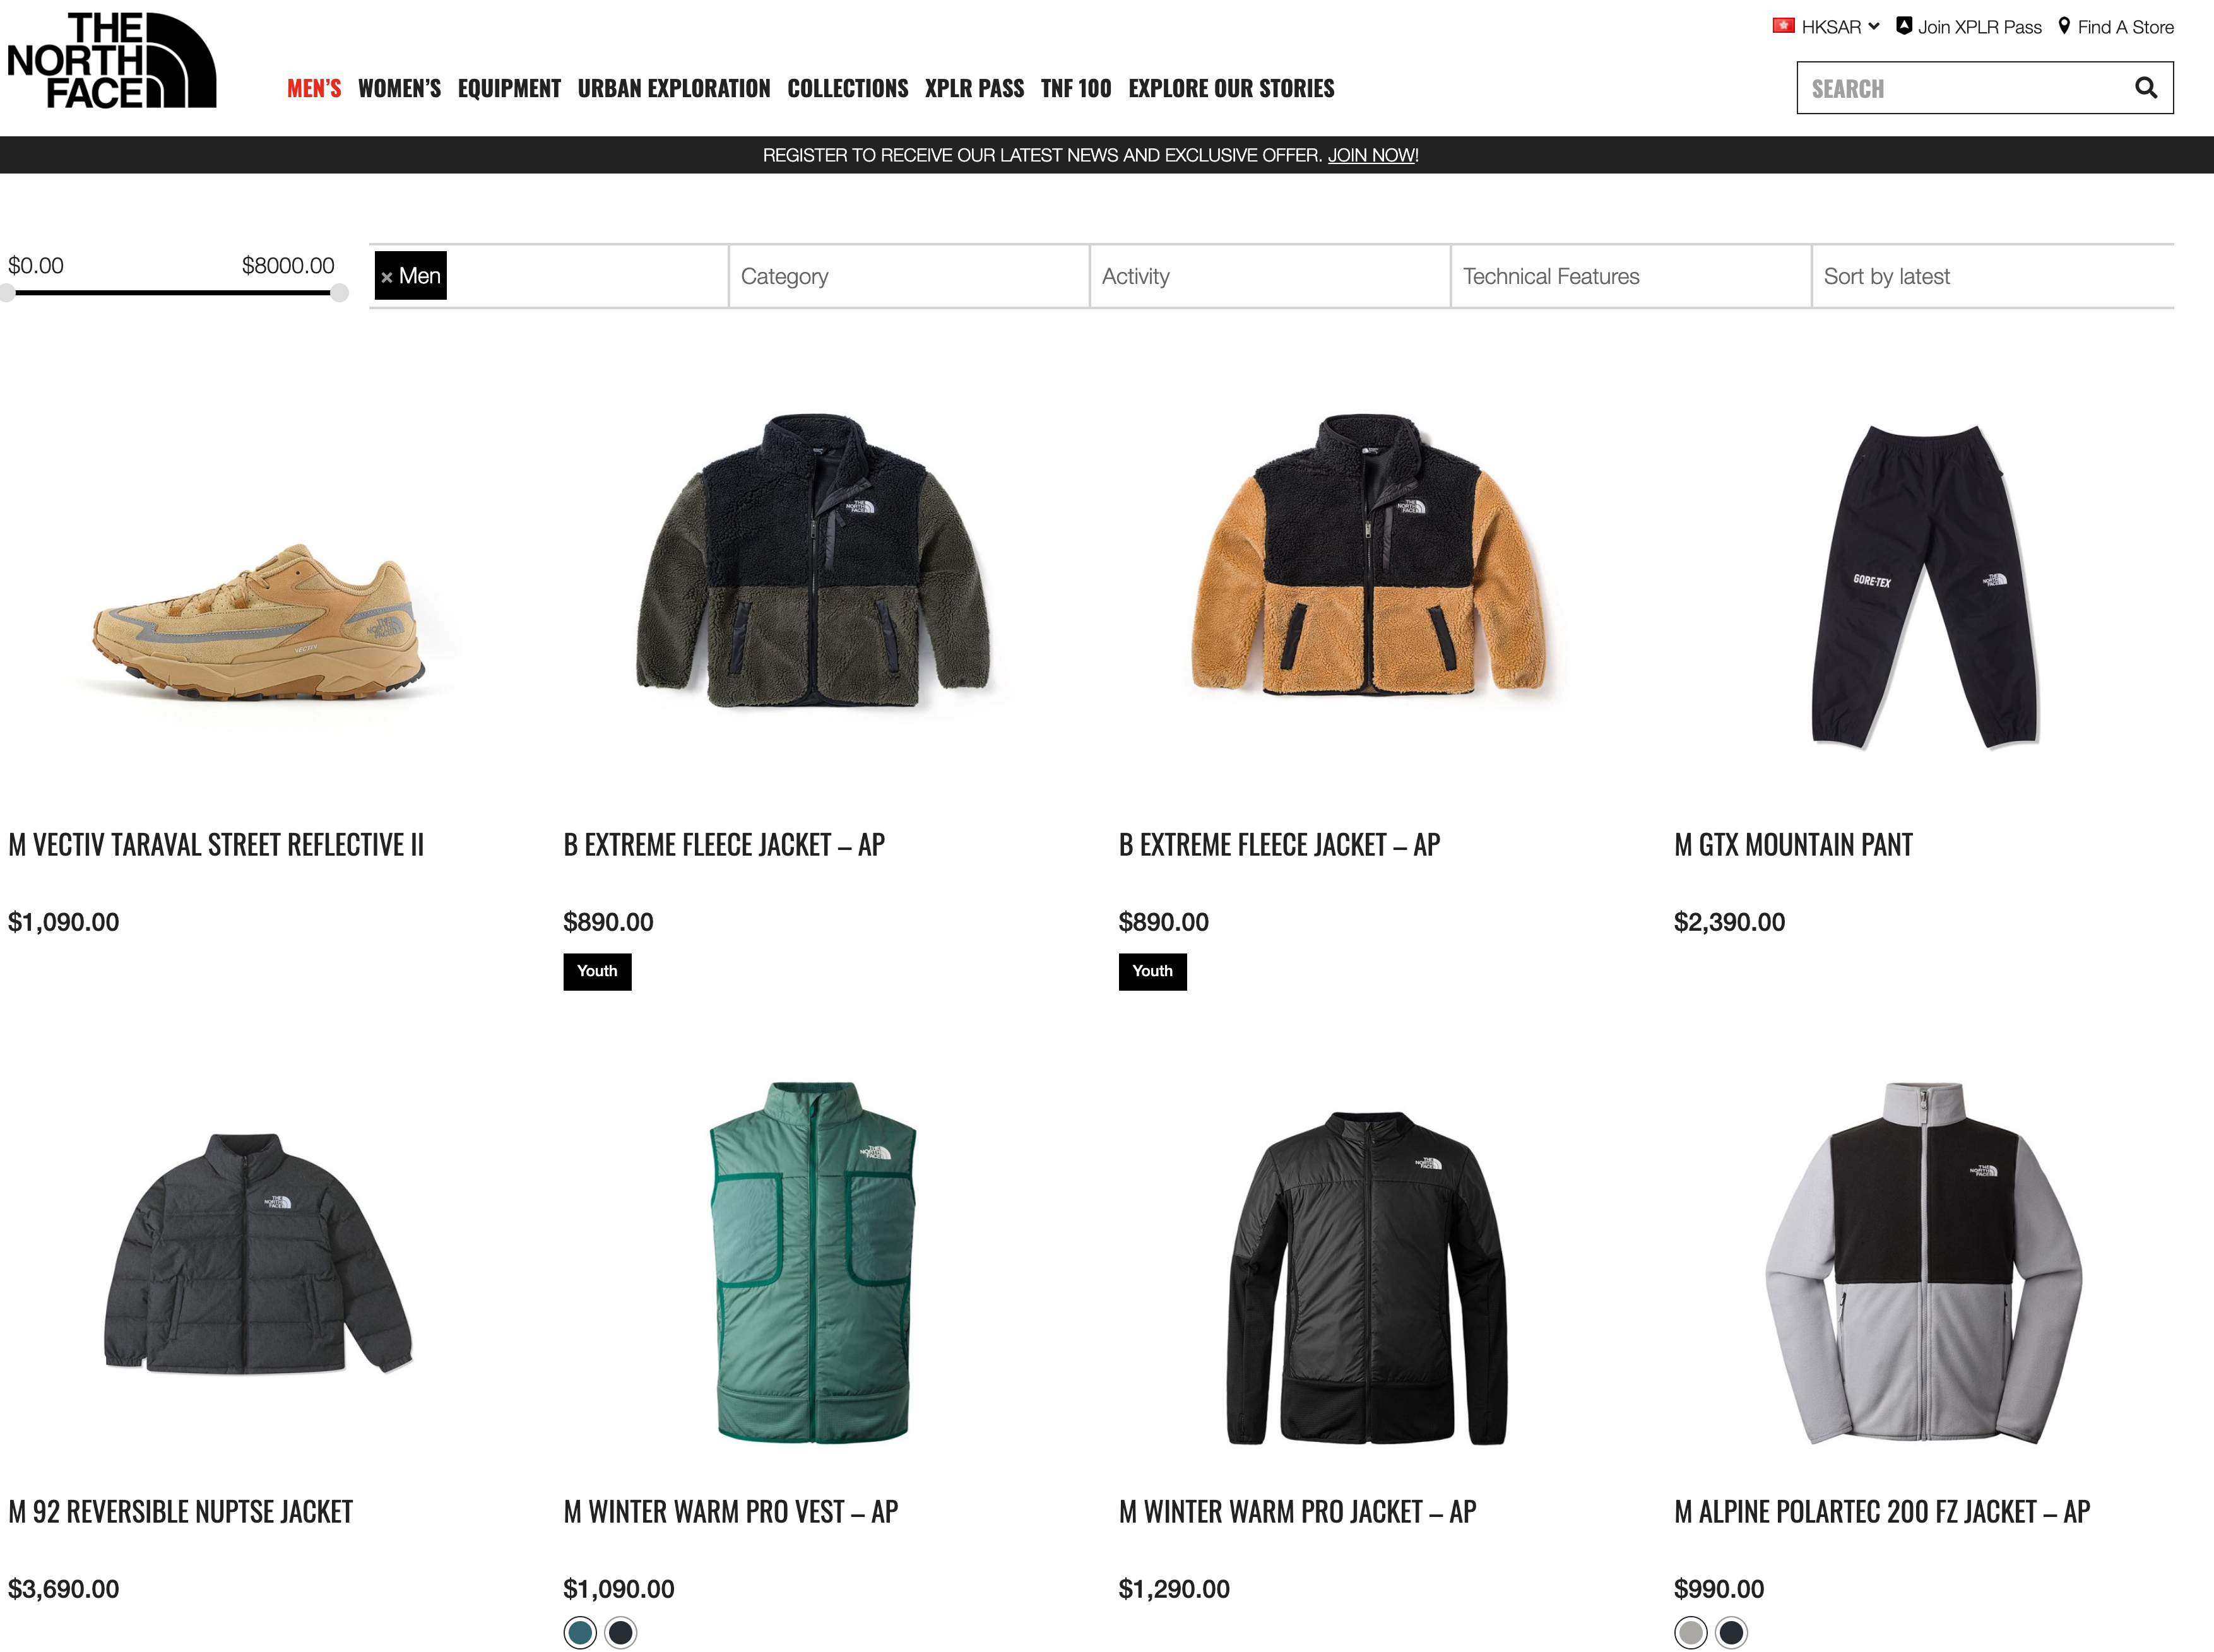

In [ ]:
nf_url = 'https://www.thenorthface.com.hk/shop/?filters=gender%5Bmen%5D'
driver.get(nf_url)

In [ ]:
len(driver.page_source)

### 5.2) Simulate scroll down

In [ ]:
# Scroll down
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
# Wait for browser to load
time.sleep(3)
# Check length again
len(driver.page_source)

### 5.3) Looping till the end

In [ ]:
for i in range(100):
  # Record current page height
  current_height = driver.execute_script("return document.body.scrollHeight")
  # Scroll down
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
  time.sleep(3)
  # Check new page height
  new_height = driver.execute_script("return document.body.scrollHeight")
  # Stop if there is no change
  if new_height == current_height:
    break

# Check length again
len(driver.page_source)